In [8]:
%matplotlib inline
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn import neighbors, preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import matplotlib.pylab as plt

### Exercise 12.

In [4]:
def Power(x):
    print(x**3)

In [6]:
def Power2(x,a):
    print(x**a)

In [20]:
Power(10)

1000


In [21]:
Power2(8,17)

2251799813685248


In [22]:
Power2(131,3)

2248091


In [39]:
def Power3(x,a):
    return(x**a)

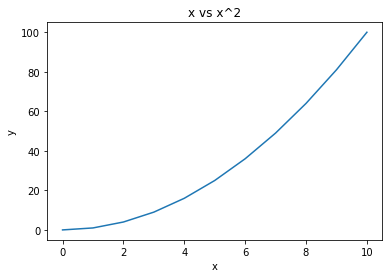

In [53]:
x = np.arange(11)
plt.plot(x, Power3(x, 2))
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs x^2')

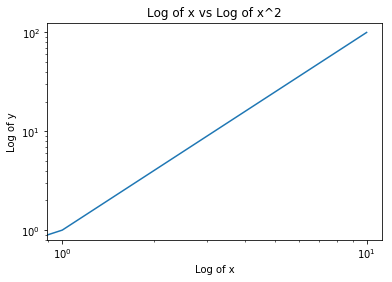

In [52]:
x = np.arange(11)
plt.plot(x, Power3(x, 2))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Log of x')
plt.ylabel('Log of y')
plt.title('Log of x vs Log of x^2')

In [48]:
def PlotPower(x,a):
    plt.plot(x,Power3(x,a))

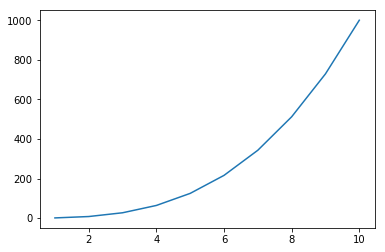

In [50]:
PlotPower(np.arange(1,11,1), 3)

### Exercise 13

In [3]:
boston = pd.read_csv('Boston.csv') 

In [4]:
boston.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [111]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [112]:
boston['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

In [113]:
boston['rad'].value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: rad, dtype: int64

### Data preprocessing

In [5]:
# transform df_chas and df_rad into dummies
df_chas = pd.get_dummies(boston['chas'])
df_rad = pd.get_dummies(boston['rad'])
df_rad.head()

,1,2,3,4,5,6,7,8,24
0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0


In [6]:
feature = boston.drop(['crim','chas','rad'],axis=1)
feature.head()

,zn,indus,nox,rm,age,dis,tax,ptratio,black,lstat,medv
0,18.0,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.0,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.0,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.0,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.0,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2


In [9]:
# Since the scale of the variables matters, we could standarize the variables.
scaler= StandardScaler()
scaler.fit(feature)
scaled_features = scaler.transform(feature)
scaled_features = pd.DataFrame(scaled_features,columns = feature.columns)
scaled_features.head()

,zn,indus,nox,rm,age,dis,tax,ptratio,black,lstat,medv
0,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-1.106115,0.113032,0.441052,-1.026501,1.487503


In [125]:
# combine the standadized variables with dummies
feature = pd.concat([scaled_features, df_chas, df_rad], axis=1)
feature.head()

,zn,indus,nox,rm,age,dis,tax,ptratio,black,lstat,...,1,1,2,3,4,5,6,7,8,24
0,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.666608,-1.459000,0.441052,-1.075562,...,0,1,0,0,0,0,0,0,0,0
1,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.987329,-0.303094,0.441052,-0.492439,...,0,0,1,0,0,0,0,0,0,0
2,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.987329,-0.303094,0.396427,-1.208727,...,0,0,1,0,0,0,0,0,0,0
3,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-1.106115,0.113032,0.416163,-1.361517,...,0,0,0,1,0,0,0,0,0,0
4,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-1.106115,0.113032,0.441052,-1.026501,...,0,0,0,1,0,0,0,0,0,0


In [138]:
df_x = feature
df_y = pd.Series(np.where(boston['crim']> np.median(boston['crim']),1,0))

In [139]:
x_train,x_test,y_train,y_test=train_test_split(\
    df_x, df_y, test_size=0.3, random_state=42)

### logistic regression: with all the features

In [141]:
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [145]:
logit_pred = logit.predict(x_test)
conf = pd.crosstab(index=y_test, columns=logit_pred, rownames=['True'], colnames=['Predicted'])
print(conf)

Predicted   0   1
True             
0          74   2
1           8  68


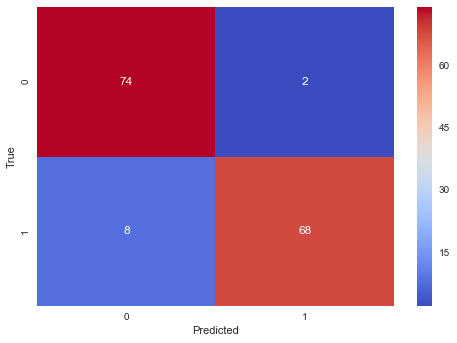

In [147]:
sns.heatmap(conf,cmap='coolwarm',annot=True,fmt='g')

In [148]:
print (classification_report(y_test,logit_pred))

             precision    recall  f1-score   support

          0       0.90      0.97      0.94        76
          1       0.97      0.89      0.93        76

avg / total       0.94      0.93      0.93       152



In [149]:
np.where(logit_pred!=y_test)

(array([  2,  14,  29,  40,  65,  79,  87, 125, 130, 143]),)

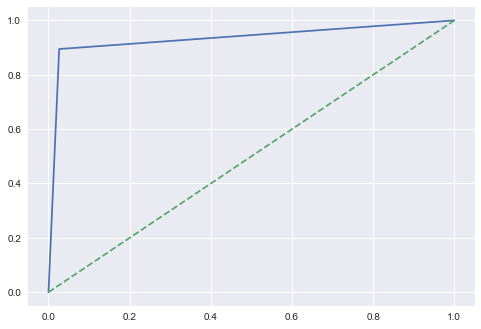

In [161]:
# generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logit_pred)

fpr_rand = tpr_rand = np.linspace(0, 1, 10)

plt.plot(fpr, tpr)
plt.plot(fpr_rand, tpr_rand, linestyle='--')
plt.show()

In [164]:
roc_auc_score(y_test, logit_pred)

0.9342105263157896

### k nearest neighbor

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [150]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [152]:
knn_1_pred = knn.predict(x_test)

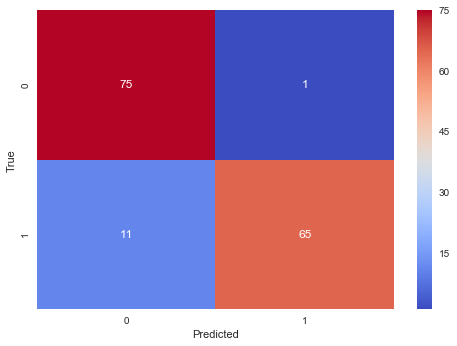

In [153]:
conf = pd.crosstab(index=y_test, columns=knn_1_pred, rownames=['True'], colnames=['Predicted'])
sns.heatmap(conf,cmap='coolwarm',annot=True,fmt='g')

In [154]:
print (classification_report(y_test,knn_1_pred))

             precision    recall  f1-score   support

          0       0.87      0.99      0.93        76
          1       0.98      0.86      0.92        76

avg / total       0.93      0.92      0.92       152



In [175]:
roc_auc_score(y_test, knn_1_pred)

0.92105263157894723

### choosing the value of K

In [165]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [167]:
error_rate

[0.078947368421052627,
 0.072368421052631582,
 0.072368421052631582,
 0.072368421052631582,
 0.072368421052631582,
 0.072368421052631582,
 0.078947368421052627,
 0.085526315789473686,
 0.072368421052631582,
 0.092105263157894732,
 0.10526315789473684,
 0.085526315789473686,
 0.085526315789473686,
 0.085526315789473686,
 0.085526315789473686,
 0.085526315789473686,
 0.085526315789473686,
 0.085526315789473686,
 0.085526315789473686,
 0.085526315789473686,
 0.092105263157894732,
 0.092105263157894732,
 0.092105263157894732,
 0.11842105263157894,
 0.1118421052631579,
 0.10526315789473684,
 0.098684210526315791,
 0.13157894736842105,
 0.11842105263157894,
 0.14473684210526316,
 0.13157894736842105,
 0.15131578947368421,
 0.14473684210526316,
 0.15789473684210525,
 0.15131578947368421,
 0.15131578947368421,
 0.15131578947368421,
 0.15131578947368421,
 0.15131578947368421]

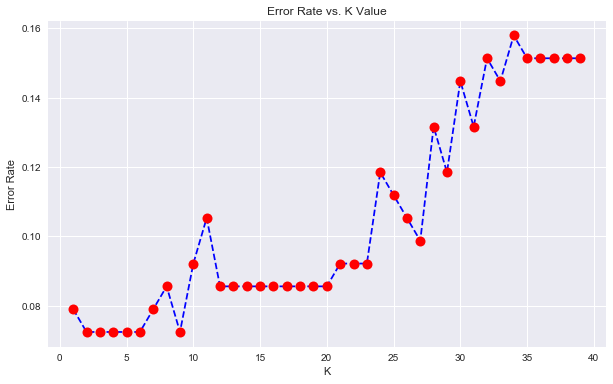

In [166]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

             precision    recall  f1-score   support

          0       0.87      1.00      0.93        76
          1       1.00      0.86      0.92        76

avg / total       0.94      0.93      0.93       152



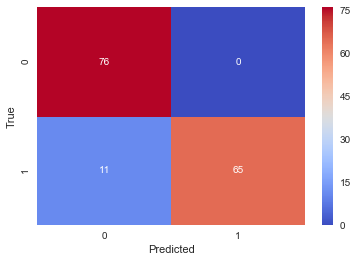

In [171]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
knn_2_pred = knn.predict(x_test)
conf = pd.crosstab(index=y_test, columns=knn_2_pred, rownames=['True'], colnames=['Predicted'])
sns.heatmap(conf,cmap='coolwarm',annot=True,fmt='g')
print (classification_report(y_test,knn_2_pred))

In [174]:
roc_auc_score(y_test, knn_2_pred)

0.92763157894736836

### Linear Discriminant Analysis

In [157]:
lda = LinearDiscriminantAnalysis()

In [159]:
lda.fit(x_train,y_train)
lda_pred = lda.predict(x_test)

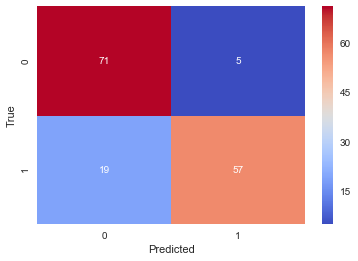

In [168]:
conf = pd.crosstab(index=y_test, columns=lda_pred, rownames=['True'], colnames=['Predicted'])
sns.heatmap(conf,cmap='coolwarm',annot=True,fmt='g')

In [160]:
print(classification_report(y_test,lda_pred))

             precision    recall  f1-score   support

          0       0.79      0.93      0.86        76
          1       0.92      0.75      0.83        76

avg / total       0.85      0.84      0.84       152



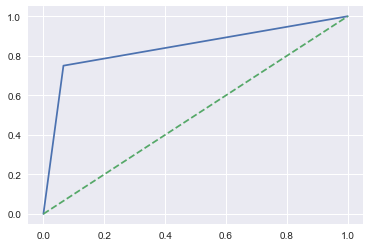

In [169]:
# generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lda_pred)

fpr_rand = tpr_rand = np.linspace(0, 1, 10)

plt.plot(fpr, tpr)
plt.plot(fpr_rand, tpr_rand, linestyle='--')
plt.show()

In [170]:
roc_auc_score(y_test, lda_pred)

0.8421052631578948

* From above analysis, we could conclude that logistic regression has the best performance with auc socre 0.934